# Read the data

In [1]:
tracks_dataset = "../../DS_1_train.csv"
electrons_dataset = "../../DS_1_electron_train.csv"

In [2]:
import numpy as np

In [20]:
tracks = np.genfromtxt(tracks_dataset, delimiter=',', names=True, dtype=[np.int] * 2 + [np.float] * 6 + [np.bool])
electrons = np.genfromtxt(electrons_dataset, names=True, delimiter=',')

# Visualizing with matplotlib
Matplotlib is a library for data visualiztion.

It features quick and simple interfaces for basic problems (e.g. plot histogram) while still allowing for full customization on demand.

In this notebook we shall cover common use cases applied to HEP data we have just loaded

In [4]:
import matplotlib.pyplot as plt
# display plots right inside notebook (not in a popup window)
%matplotlib inline

# Line plot

* You provide X and Y of points, matplotlib connects them in a line

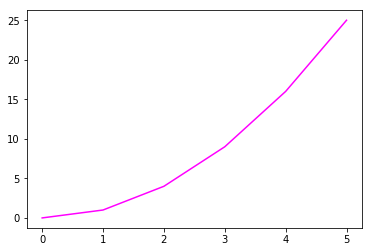

In [5]:
plt.plot([0, 1, 2, 3, 4, 5], [0, 1, 4, 9, 16, 25], c='magenta');

# Scatter plot

* Takes X and Y just like .plot, but does not connect the dots with lines.
* Useful to explore data structure
* Note that plots can also have some customizations: color, opacity, title, etc.
  * Press shift+Tab with text cursor on a function to see details
  * for more information, press shift+Tab+Tab and so on

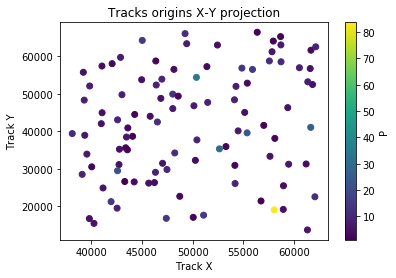

In [6]:
fig, ax = plt.subplots()
# c is for color
electorons_plot = ax.scatter(electrons["X"], electrons["Y"], c=electrons["P"])
colorbar = fig.colorbar(electorons_plot)
colorbar.set_label("P")
ax.set_title("Tracks origins X-Y projection")
ax.set_xlabel("Track X")
ax.set_ylabel("Track Y");

# 3D plot

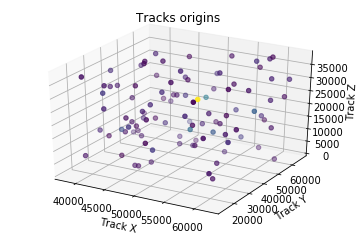

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(electrons["X"], electrons["Y"], electrons["Z"], c=electrons["P"]);
ax.set_title("Tracks origins")
ax.set_xlabel("Track X")
ax.set_ylabel("Track Y")
ax.set_zlabel("Track Z");

# Histogram

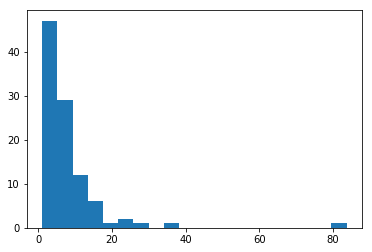

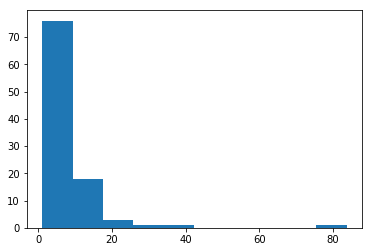

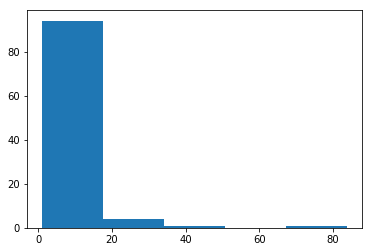

In [8]:
fig, ax = plt.subplots()
ax.hist(electrons["P"], bins=20)
fig, ax = plt.subplots()
ax.hist(electrons["P"], bins=10)
fig, ax = plt.subplots()
ax.hist(electrons["P"], bins=5);

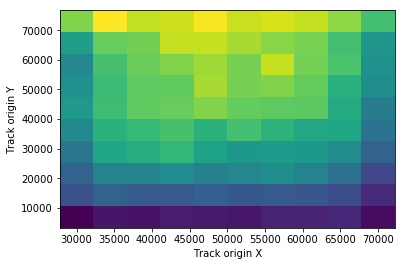

In [9]:
fig, ax = plt.subplots()
plt.hist2d(tracks["X"], tracks["Y"], normed=True)
ax.set_xlabel("Track origin X")
ax.set_ylabel("Track origin Y");

# Exercises
## One
Plot y = x**2

In [10]:
# <your code>

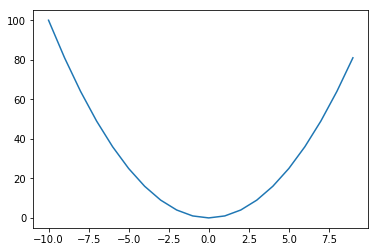

In [11]:
# solution
x = np.arange(-10, 10)
y = x**2
fig, ax = plt.subplots()
ax.plot(x, y);

## Two
Plot all track origins X-Y projections that correspond to any particular electron. Plot that electron X-Y trajectory projection in red on top

In [12]:
# <your code>

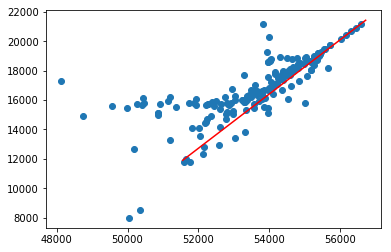

In [13]:
event_id_to_plot = 288
event_to_plot = tracks[tracks["event_id"] == event_id_to_plot]
fig, ax = plt.subplots()
ax.scatter(event_to_plot["X"], event_to_plot["Y"]);
electron_to_plot = electrons[electrons["event_id"] == event_id_to_plot]
origin_X = electron_to_plot["X"][0]
origin_Y = electron_to_plot["Y"][0]
dZ = 5e4
X = [origin_X, origin_X + dZ*electron_to_plot["TX"][0]]
Y = [origin_Y, origin_Y + dZ*electron_to_plot["TY"][0]]
ax.plot(X, Y, c='r');

# Three
Same as two, in 3D, not X-Y projection

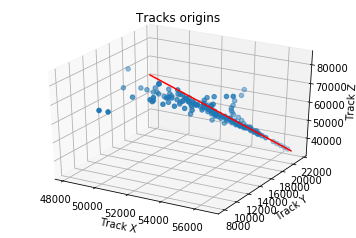

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(event_to_plot["X"], event_to_plot["Y"], event_to_plot["Z"])
origin_Z = electron_to_plot["Z"][0]
Z = [origin_Z, origin_Z + dZ]
ax.plot(X, Y, Z, c='r')
ax.set_title("Tracks origins")
ax.set_xlabel("Track X")
ax.set_ylabel("Track Y")
ax.set_zlabel("Track Z");

# Four
Plot a histogram of tracks $\chi^2$

In [15]:
# <your code>

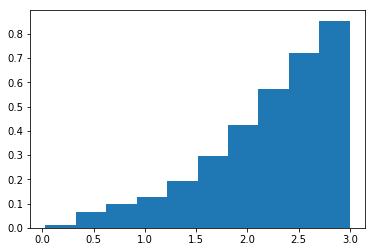

In [16]:
fig, ax = plt.subplots()
ax.hist(tracks["chi2"], normed=True);

# Five
Plot a 2D histogram of signal tracks X and Y. Why do you think it's different from the histogram for all tracks above?

In [17]:
# <your code>

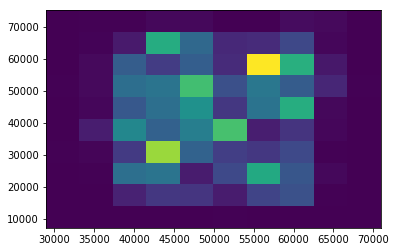

In [18]:
signal_tracks = tracks[tracks["signal"]]
fig, ax = plt.subplots()
ax.hist2d(signal_tracks["X"], signal_tracks["Y"]);